### Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'C:/Users/hashi/Downloads/archive/multiple_sentences/multiple_sentences/S_01_4002_VE1.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

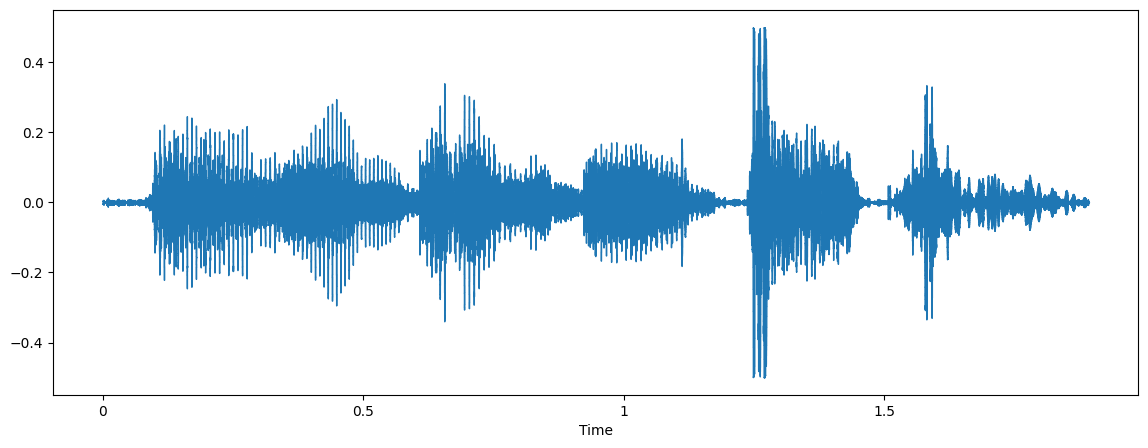

In [4]:
# Sentence 1, Male english version
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename=filename)

In [5]:
import pandas as pd
csv = 'C:/Users/hashi/Downloads/archive/BVC_Voice_Bio_Public.xlsx'

metadata = pd.read_excel(csv)

print(len(metadata))
metadata.head(10)

560


,New_ID,Sex,Age,Ethnicity
0,4001,'Male',19,'Igbo'
1,4002,'Male',23,'Igbo'
2,4003,'Female',18,'Ikwerre'
3,4004,'Male',23,'Annang'
4,4005,'Female',17,'Igbo'
5,4006,'Female',26,'Ishan'
6,4007,'Female',29,'Igbo'
7,4008,'Female',18,'Ijaw'
8,4010,'Male',24,'Igbo'
9,4011,'Female',22,'Igbo'


### Data Preprocessing

In [6]:
mfccs = librosa.feature.mfcc(y= data, sr= sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 82)


In [7]:
mfccs

array([[-4.7288263e+02, -4.5572324e+02, -4.5236621e+02, ...,
        -4.3251392e+02, -4.3644922e+02, -4.6422073e+02],
       [ 3.2265480e+01,  2.3703983e+01,  3.0175190e+01, ...,
         5.3184669e+01,  5.0420975e+01,  5.7385139e+01],
       [ 3.8326797e+01,  3.6272057e+01,  3.6426003e+01, ...,
         4.5287041e+01,  4.8580112e+01,  4.3526405e+01],
       ...,
       [-6.6926422e+00, -1.2367871e+00,  2.9453039e-01, ...,
        -4.4695883e+00,  9.9921292e-01,  3.5476544e+00],
       [-5.0864935e+00, -6.3593822e+00, -6.9990959e+00, ...,
        -6.9957733e+00, -8.5678997e+00, -5.9132710e+00],
       [-8.0188599e+00, -6.6516833e+00, -2.6816356e+00, ...,
        -2.6565707e-01, -4.1755457e+00, -6.9432764e+00]], dtype=float32)

In [8]:
# Extracting MFCC for every audio file
import os
from os import path
import numpy as np

audio_dataset_path = 'C:/Users/hashi/Downloads/archive/multiple_sentences/multiple_sentences/'
metadata.head()

,New_ID,Sex,Age,Ethnicity
0,4001,'Male',19,'Igbo'
1,4002,'Male',23,'Igbo'
2,4003,'Female',18,'Ikwerre'
3,4004,'Male',23,'Annang'
4,4005,'Female',17,'Igbo'


In [9]:
# Adding a column with the file names for each person


ids = list(metadata.loc[:,"New_ID"])
file_names = []

for id in ids:
    if path.exists(audio_dataset_path+"S_01_"+str(id)+"_VE1.wav"):
        file_names.append("S_01_"+str(id)+"_VE1.wav")
    elif path.exists(audio_dataset_path+"S_02_"+str(id)+"_VE1.wav"):
        file_names.append("S_02_"+str(id)+"_VE1.wav")
    else:
        file_names.append("")

metadata["FileName"] = file_names

# now we will remove the rows for wich we could not find a sound file
metadata["FileName"].replace("", np.nan, inplace=True)
metadata.dropna(subset=["FileName"], inplace=True)

print(len(metadata))
metadata.head(10)


285


,New_ID,Sex,Age,Ethnicity,FileName
0,4001,'Male',19,'Igbo',S_02_4001_VE1.wav
1,4002,'Male',23,'Igbo',S_01_4002_VE1.wav
4,4005,'Female',17,'Igbo',S_01_4005_VE1.wav
7,4008,'Female',18,'Ijaw',S_02_4008_VE1.wav
9,4011,'Female',22,'Igbo',S_01_4011_VE1.wav
12,4021,'Female',21,'Igbo',S_01_4021_VE1.wav
16,4029,'Female',17,'Urhobo',S_01_4029_VE1.wav
17,4030,'Male',16,'Igbo',S_02_4030_VE1.wav
19,4033,'Female',19,'Igbo',S_01_4033_VE1.wav
22,4038,'Female',21,'Ibibio',S_01_4038_VE1.wav


In [10]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:
# we will iterate through the dataframe for each file and extract the features using mfcc

extracted_features = []

for index_num, row in metadata.iterrows():
    filename = audio_dataset_path+str(row["FileName"])
    final_sex_label = row["Sex"]
    data = feature_extractor(filename)
    extracted_features.append([data, final_sex_label])


In [12]:
# convert extracted_features into a dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns=["features","class"])
extracted_features_df.head()

,features,class
0,"[-223.0078, 138.95247, 11.519297, 25.012098, 8...",'Male'
1,"[-263.58435, 100.904655, 22.466015, 42.864582,...",'Male'
2,"[-333.9693, 83.25526, 24.133266, 32.22218, 0.8...",'Female'
3,"[-292.04102, 54.49199, 8.89638, 33.37413, -2.5...",'Female'
4,"[-281.9083, 88.11478, 11.669571, 25.672903, -2...",'Female'


In [13]:
# split the data into dependent and independent dataset

X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(285, 40)

In [15]:
# label encoding
y = np.array(pd.get_dummies(y))

In [16]:
y.shape

(285, 2)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Classification

#### model creation

In [18]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [20]:
# number of classes, should be 2
num_labels = y.shape[1]

In [21]:
model = Sequential()
### first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [27]:
## training the model

num_epochs = 100
num_batch_size = 32

model.fit(X_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5468 - accuracy: 0.7632 - val_loss: 0.5549 - val_accuracy: 0.6842
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7149 - val_loss: 0.5591 - val_accuracy: 0.7018
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5418 - accuracy: 0.7500 - val_loss: 0.5587 - val_accuracy: 0.6842
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7368 - val_loss: 0.5576 - val_accuracy: 0.7018
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7544 - val_loss: 0.5513 - val_accuracy: 0.7193
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7368 - val_loss: 0.5520 - val_accuracy: 0.7018
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7456 - val_loss: 0.5505 - val_accuracy: 0.7018
Epoch 8/100
8/8 [==========

In [29]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7017543911933899


In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
y = np.array(extracted_features_df['class'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [40]:
svm = SVC()
model_assess(svm, "Support Vector Machine")

lg = LogisticRegression()
model_assess(lg, "Logistic Regression")

Accuracy Support Vector Machine : 0.63158 

Accuracy Logistic Regression : 0.63158 



c:\Users\hashi\anaconda3\envs\FinalProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
